<a href="https://colab.research.google.com/github/Akashn007/Akash_Kumar_N_INBT03975_AUG_2023/blob/main/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##IMDB Dataset

#Dataset Preparation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('IMDBDataset.csv')

Mounted at IMDBDataset.csv


In [ ]:
data=pd.read_csv('/content/IMDBDataset.csv/MyDrive/IMDBDataset.csv',error_bad_lines=False)
data.head()

<ipython-input-3-3aeba2dbf5fa>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data=pd.read_csv('/content/IMDBDataset.csv/MyDrive/IMDBDataset.csv',error_bad_lines=False)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.shape

(50000, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


#Data Distribution

Text(0.5, 1.0, 'sentiment distribution')

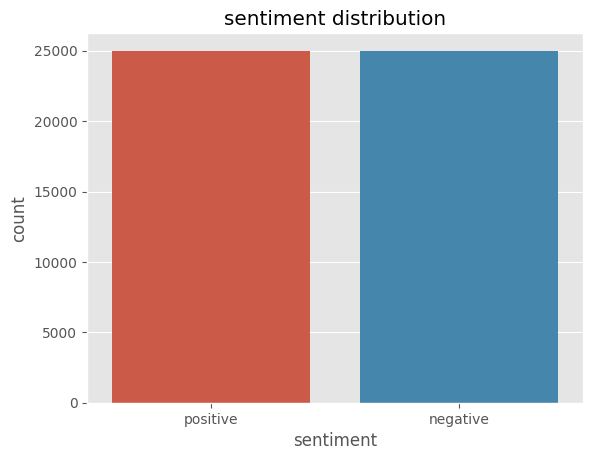

In [ ]:
sns.countplot(x='sentiment',data=data)
plt.title('sentiment distribution')

In [ ]:
for i in range(5):
  print("review:",[i])
  print(data['review'].iloc[i],'\n')
  print('sentiment:',data['sentiment'].iloc[i],'\n\n')

review: [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is du

In [ ]:
def no_of_words(text):
  words=text.split()
  word_count=len(words)
  return word_count

#Text Processing

In [ ]:
#text processing
data['word count']=data['review'].apply(no_of_words)

In [ ]:
data.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


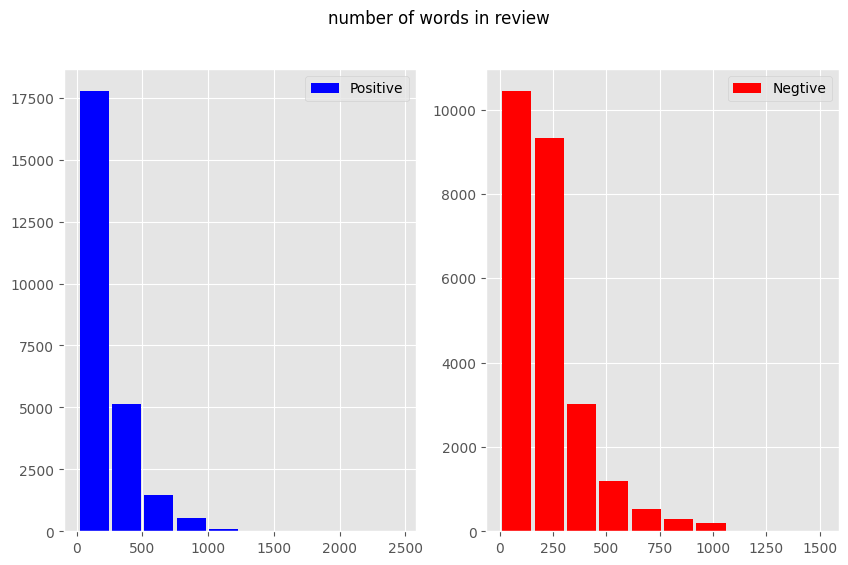

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
ax[0].hist(data[data['sentiment']=='positive']['word count'],label='Positive',color='blue',rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(data[data['sentiment']=='negative']['word count'],label='Negtive',color='red',rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle('number of words in review')
plt.show()



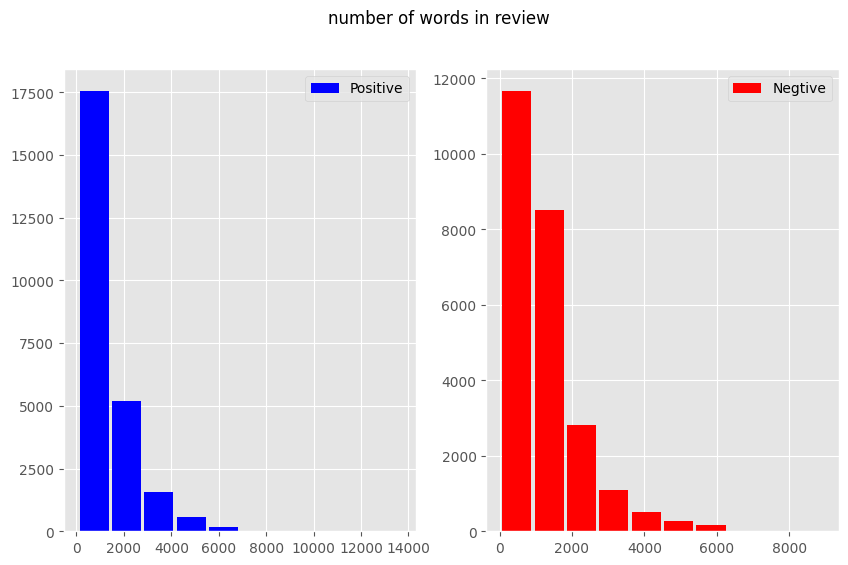

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
ax[0].hist(data[data['sentiment']=='positive']['review'].str.len(),label='Positive',color='blue',rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(data[data['sentiment']=='negative']['review'].str.len(),label='Negtive',color='red',rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle('number of words in review')
plt.show()

In [ ]:
data.sentiment.replace('positive',1,inplace=True)
data.sentiment.replace('negative',2,inplace=True)

In [ ]:
data.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,2,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words=set(stopwords.words('english'))

#Data Processing

In [ ]:
#data processing
def data_processing(text):
  text=text.lower()
  text=re.sub('<br/>','',text)
  text=re.sub(r"https\S+|ww\S+|http\S+",'',text,flags=re.MULTILINE)
  text=re.sub(r'\@w+|\#','',text)
  text=re.sub(r'[^\w\s]','',text)
  text_tokens=word_tokenize(text)
  filtered_text=[w for w in text_tokens if not w in stop_words]
  return " ".join(filtered_text)
def remove_stopwords(text):
  stop_words = set(stopwords.words("english"))
  words = nltk.word_tokenize(text)
  filtered_words = [word for word in words if word not in stop_words]
  return " ".join(filtered_words)

def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

In [ ]:
data.review=data['review'].apply(data_processing)

In [ ]:
duplicated_count=data.duplicated().sum()
print('number of duplicate entries: ',duplicated_count)

number of duplicate entries:  421


In [ ]:
data=data.drop_duplicates('review')

In [ ]:
stemmer=PorterStemmer()
def stemming(data):
  text=[stemmer.stem(word) for word in data]
  return data

In [ ]:
data.review=data['review'].apply(lambda x: stemming(x))

In [ ]:
 pos_reviews=data[data.sentiment==1]
 pos_reviews.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,307
1,wonderful little production br br filming tech...,1,162
2,thought wonderful way spend time hot summer we...,1,166
4,petter matteis love time money visually stunni...,1,230
5,probably alltime favorite movie story selfless...,1,119


#Naive Bayes Classification

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
def tokenize(text):
    return word_tokenize(text)

# Apply tokenization to the 'review' column
data['tokens'] = data['review'].apply(tokenize)

# Convert tokenized reviews to numerical feature vectors using TF-IDF (from previous code)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features
tfidf_features = tfidf_vectorizer.fit_transform(data['review'])
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
X = tfidf_df
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)


MultinomialNB()

In [ ]:
y_pred = naive_bayes.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy: ",accuracy*100)
print("confusion matrix:",conf_matrix)
print("classification report:",class_report)

Accuracy:  83.74344493747479
confusion matrix: [[4323  740]
 [ 872 3981]]
classification report:               precision    recall  f1-score   support

           1       0.83      0.85      0.84      5063
           2       0.84      0.82      0.83      4853

    accuracy                           0.84      9916
   macro avg       0.84      0.84      0.84      9916
weighted avg       0.84      0.84      0.84      9916



In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#cross-validation
from sklearn.model_selection import cross_val_score
from nltk.stem import WordNetLemmatizer
cv_scores = cross_val_score(naive_bayes, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores.mean())
# Predict a review sentiment
def predict_sentiment(review):
    preprocessed_review = data_processing(review)
    preprocessed_review = remove_stopwords(preprocessed_review)
    preprocessed_review = apply_lemmatization(preprocessed_review)
    tokenized_review = tokenize(preprocessed_review)
    review_vector = tfidf_vectorizer.transform([" ".join(tokenized_review)])
    prediction = naive_bayes.predict(review_vector)
    return prediction[0]

review_to_predict = "This movie was really great! I enjoyed it a lot."
predicted_sentiment = predict_sentiment(review_to_predict)
print("Predicted Sentiment:", predicted_sentiment)

Cross-Validation Accuracy: 0.8369841942106941
Predicted Sentiment: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


#Prediction

In [ ]:
#Create a function to predict sentiment:
def predict_sentiment(review):
    preprocessed_review = data_processing(review)
    preprocessed_review = remove_stopwords(preprocessed_review)
    preprocessed_review = apply_lemmatization(preprocessed_review)
    tokenized_review = tokenize(preprocessed_review)
    review_vector = tfidf_vectorizer.transform([" ".join(tokenized_review)])
    prediction = naive_bayes.predict(review_vector)
    return "Positive" if prediction[0] == 1 else "Negative"

#Create a command-line interface:
def main():
    print("Welcome to Movie Review Sentiment Predictor!")
    while True:
        review = input("Enter your movie review (or 'exit' to quit): ")
        if review.lower() == 'exit':
            break
        sentiment = predict_sentiment(review)
        print(f"Predicted Sentiment: {sentiment}")

if __name__ == "__main__":
    main()

Welcome to Movie Review Sentiment Predictor!
Enter your movie review (or 'exit' to quit): exit


#Data Distribution

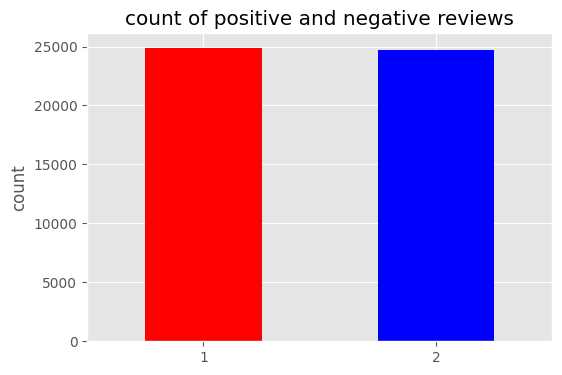

In [ ]:
plt.figure(figsize=(6,4))
data['sentiment'].value_counts().plot(kind='bar',color=['red','blue'])
plt.title('count of positive and negative reviews')
plt.xlabel=('sentiment')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

#Word Frequency Analysis

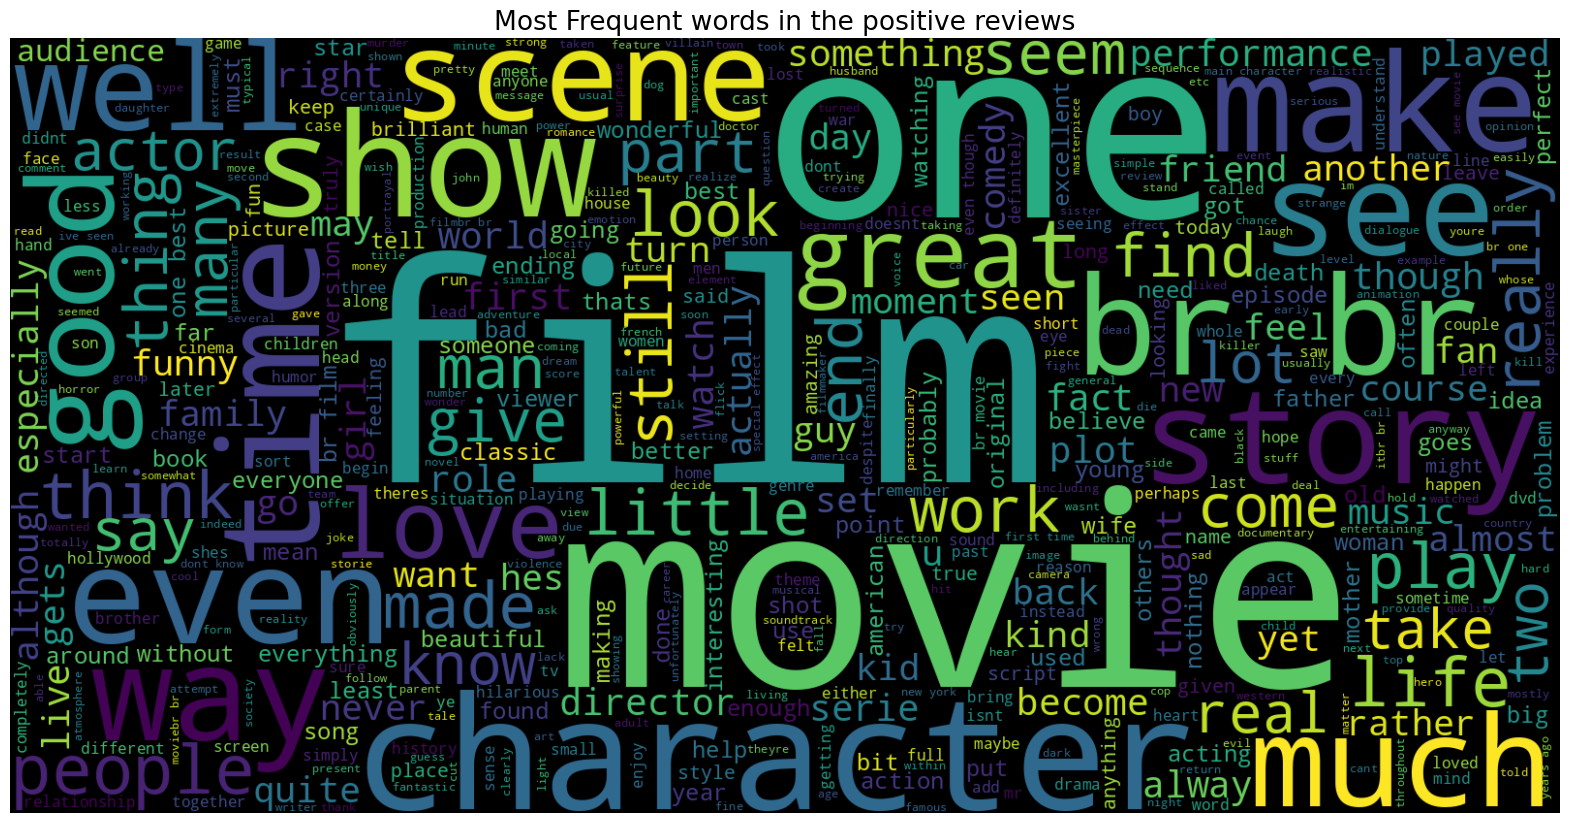

In [ ]:

  text=''.join([word for word in pos_reviews['review']])
  plt.figure(figsize=(20,15),facecolor='None')
  wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.title('Most Frequent words in the positive reviews',fontsize=19)
  plt.show()

In [ ]:
from collections import Counter
count=Counter()
for text in pos_reviews['review'].values:
  for word in text.split():
    count[word]+=1
count.most_common(15)

[('br', 55051),
 ('film', 39278),
 ('movie', 35833),
 ('one', 25989),
 ('like', 17087),
 ('good', 14330),
 ('great', 12655),
 ('story', 12356),
 ('see', 11879),
 ('time', 11725),
 ('well', 11077),
 ('also', 10669),
 ('really', 10658),
 ('would', 10329),
 ('even', 9432)]

In [ ]:
pos_words=pd.DataFrame(count.most_common(15))
pos_words.columns=['word','count']
pos_words.head()

,word,count
0,br,55051
1,film,39278
2,movie,35833
3,one,25989
4,like,17087


In [ ]:
px.bar(pos_words,x='count',y='word',title='common words in positive review',color='word')

In [ ]:
 neg_reviews=data[data.sentiment==2]
 neg_reviews.head()

,review,sentiment,word count,tokens
3,basically theres family little boy jake thinks...,2,138,"[basically, theres, family, little, boy, jake,..."
7,show amazing fresh innovative idea 70s first a...,2,174,"[show, amazing, fresh, innovative, idea, 70s, ..."
8,encouraged positive comments film looking forw...,2,130,"[encouraged, positive, comments, film, looking..."
10,phil alien one quirky films humour based aroun...,2,96,"[phil, alien, one, quirky, films, humour, base..."
11,saw movie 12 came recall scariest scene big bi...,2,180,"[saw, movie, 12, came, recall, scariest, scene..."


In [ ]:
count=Counter()
for text in neg_reviews['review'].values:
  for word in text.split():
    count[word]+=1
count.most_common(15)

[('br', 57886),
 ('movie', 47001),
 ('film', 34648),
 ('one', 24648),
 ('like', 21580),
 ('even', 14935),
 ('good', 14033),
 ('bad', 13953),
 ('would', 13496),
 ('really', 12117),
 ('time', 11341),
 ('see', 10449),
 ('dont', 10140),
 ('get', 9896),
 ('much', 9774)]

In [ ]:
neg_words=pd.DataFrame(count.most_common(15))
neg_words.columns=['word','count']
neg_words.head()

,word,count
0,br,57886
1,movie,47001
2,film,34648
3,one,24648
4,like,21580


In [ ]:
px.bar(neg_words,x='count',y='word',title='common words in negative review',color='word')


#Model Performance Evaluation

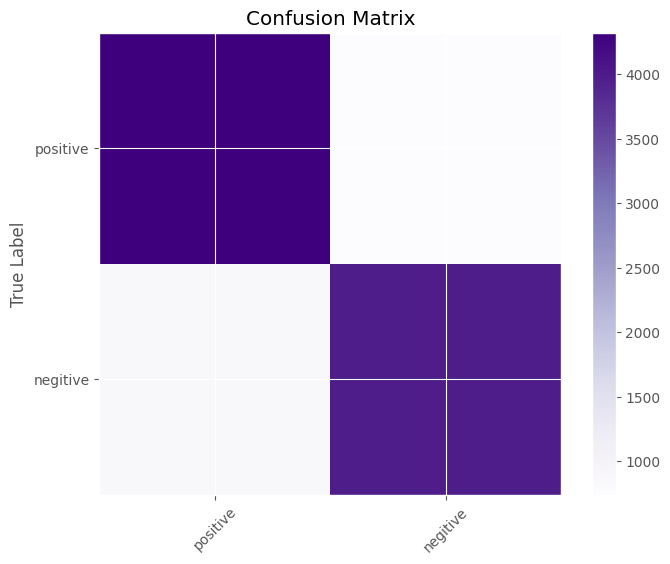

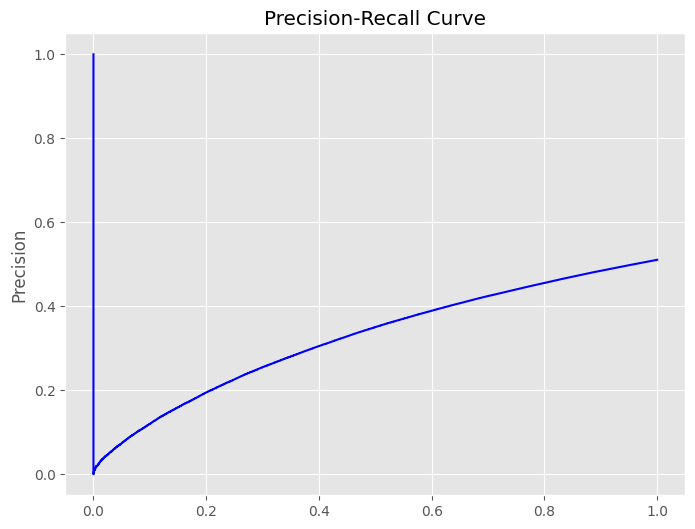

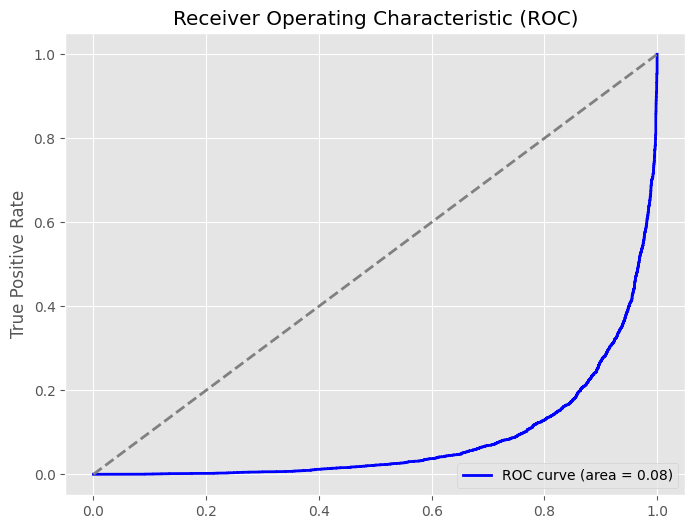

In [ ]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,roc_curve,auc
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Purples)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True Label')
    plt.show()
y_pred = naive_bayes.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix, classes=['positive','negitive'])



# Precision-Recall Curve visualization

precision, recall, _ = precision_recall_curve(y_test, naive_bayes.predict_proba(X_test)[:, 1],pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# ROC Curve visualization
fpr, tpr, _ = roc_curve(y_test, naive_bayes.predict_proba(X_test)[:, 1],pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()